## Analyze 1: companies that post instagram gain total focus

In [141]:
import os
from pathlib import Path
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt

p = Path(os.getcwd())
database_path=str(p.parent)+'/data/instagram.db'
print(database_path)

/Users/yutian/Desktop/final/data/instagram.db


In [142]:
## connect the database
import sqlite3

connection = sqlite3.connect(database_path)
instagram_data = pd.io.sql.read_sql("SELECT * FROM instagram;", con=connection)

In [143]:
instagram_data.head()

,id,account,filter,likes,comments,caption,timestamp
0,31044,murphyoilusa,Valencia,7,0,Elvis is in the building at Murphy Express 855...,140109 11:17
1,32057,murphyoilusa,Normal,5,0,Cool tanker! #murphyusa,140129 11:40
2,6359,murphyoilusa,Rise,6,0,Looking up! #murphyusa,121205 12:11
3,6347,murphyoilusa,Hefe,4,0,Quick Strike Energy! #murphyusa,121205 12:23
4,6351,murphyoilusa,X-Pro II,4,0,"Look out, it's Super Murph! #murphyusa",121205 12:16


In [144]:
instagram_data.sort_values(by='likes', ascending=0).head(5)

,id,account,filter,likes,comments,caption,timestamp
11330,38178,nike,Normal,260107,2919,One giant step for man. #justdoit@nicolasmuell...,140514 13:39
11349,39870,nike,Normal,250906,1434,Teach the world what your country taught you. ...,140612 15:31
11353,40016,nike,Normal,237154,1823,"When your country rises, raise the volume. #ju...",140614 09:00
11344,39451,nike,Normal,230796,1454,Don�t let anything come between where you are ...,140605 17:30
11196,35366,nike,Normal,216074,1428,We can't live without Air.It's been 27 years s...,140325 21:00


In [145]:
instagram_data.describe()

,id,likes,comments
count,34575.000000,34575.000000,34575.000000
mean,21677.659205,3690.893304,50.993955
std,10841.855251,13330.935345,218.687328
min,3451.000000,0.000000,0.000000
25%,12272.500000,31.000000,0.000000
50%,20929.000000,208.000000,4.000000
75%,31439.500000,1297.000000,21.000000
max,40191.000000,260107.000000,12567.000000


In [146]:
## total instagram photoes that companies have post
account_data=instagram_data.groupby(['account']).size().reset_index().rename(columns={0:'count'})
account_data.sort_values(by='count',ascending=0).head()

,account,count
60,loewshotels,1779
40,footlocker,1683
85,ralphlauren,1514
74,nordstrom,1458
62,macys,1250


In [147]:
## get columns contain "account","filter","likes","comments"
social_data=instagram_data[['account','filter','likes','comments']]
social_data.head(5)

,account,filter,likes,comments
0,murphyoilusa,Valencia,7,0
1,murphyoilusa,Normal,5,0
2,murphyoilusa,Rise,6,0
3,murphyoilusa,Hefe,4,0
4,murphyoilusa,X-Pro II,4,0


In [148]:
## combine all instagram photoes that companies posted and calculate focus=likes+comments 
social_data=social_data.groupby("account").sum()
social_data['focus']=social_data['likes']+social_data['comments']
social_data.sort_values(by='focus',ascending=0).head()

,likes,comments,focus
account,,,
footlocker,33580410,667097,34247507
nike,28789892,247186,29037078
starbucks,20976750,159106,21135856
ralphlauren,13152054,137324,13289378
disney,8251122,96008,8347130


In [149]:
## filter companies that gain focus greater than 500000
mask=(social_data['focus']>=500000)
plot_data=social_data.loc[mask]



/Users/yutian/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


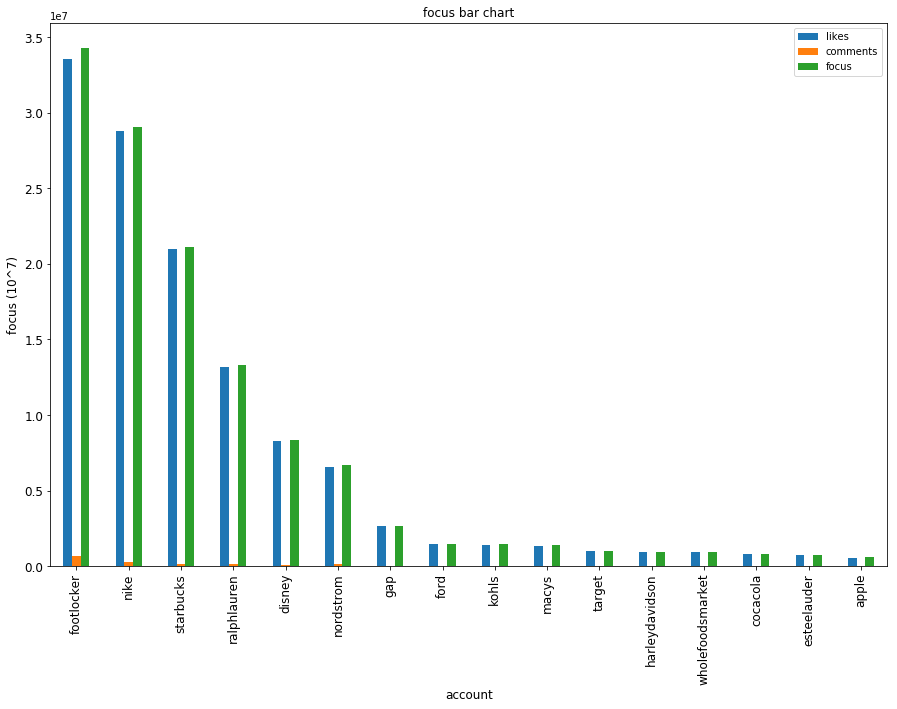

In [155]:
## draw the bar chart plot 
##ax = plot_data[['focus']].sort(ascending=0).plot(kind='bar', title ="focus bar chart", figsize=(15, 10), legend=True, fontsize=12)

ax = plot_data.sort(columns='focus',ascending=0).plot(kind='bar', title ="focus bar chart", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("account", fontsize=12)
ax.set_ylabel("focus (10^7)", fontsize=12)
plt.savefig('ana1.png')
plt.show()
##plt.savefig('ana1.png')

In [156]:
## filter number of instagram companies posted
mask=(account_data['count']>=800)
account_data=account_data.loc[mask]



/Users/yutian/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


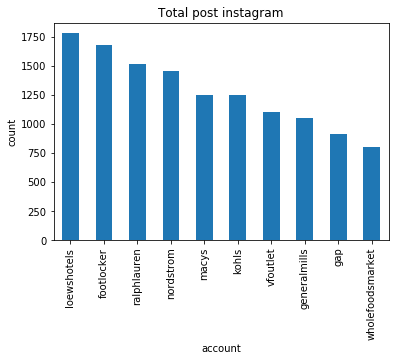

In [157]:
## draw bar chart companies posted on instagram
my_plot1 = account_data.sort(columns='count',ascending=False).plot(x='account',y='count',kind='bar',legend=None,title="Total post instagram")
my_plot1.set_xlabel("account")
my_plot1.set_ylabel("count")
plt.savefig('ana2.png')
plt.show()